<a href="https://colab.research.google.com/github/somashekar95/CO2data_cleansing/blob/dev/CO2data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  1.Is the data in the same format (per column)?
df=pd.read_csv("data.csv")
df.info() # to find the columns,count,data type
df.describe() # to find the count ,mean,std,min,25th,50th,75th percentile
df.shape # to find the size of the file(rows*column)
plt.figure(figsize=(12,6),dpi=200)


TO IDENTIFY,DROP AND FILL THE NULL VALUES

In [36]:
# 2.Are there any null / missing values?
df.isnull().sum() # total null values in each column
df.fillna(0) # fill the null values with 0
df.dropna() # to drop the null values



,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4.0,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4.0,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4.0,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4.0,AS8,Z,11.2,8.3,9.9,29,232


TO IDENTIFY AND REMOVE THE DUPLICATES

In [28]:
# 2.Are no duplicates in the data?
df.duplicated().sum() # to find the total duplicated in dataset
df.loc[df.duplicated(),:] # to identify the duplicated rows
df.drop_duplicates(keep='first').shape # to drop the duplicates in dataset
df.duplicated(subset=['Make','Model']).sum() # to find the duplicates in  each columns

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4.0,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12.0,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8.0,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8.0,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4.0,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4.0,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4.0,M6,X,7.9,5.9,7.0,40,163


TO FIND THE OUTLIERS FOR PER COLUMN

6.0
1.5


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


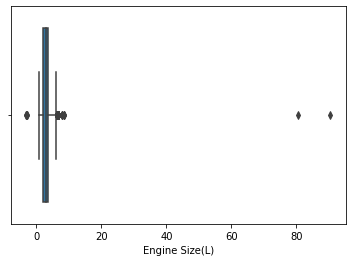

In [71]:
# 4.Any outliers in the data (per column)?
# Outliers in Engine Size(L) column
max=df['Engine Size(L)'].quantile(0.95)
print(max)
min=df['Engine Size(L)'].quantile(0.05)
print(min)
df[df['Engine Size(L)']<min]
df[df['Engine Size(L)']>max]
df1=df[(df['Engine Size(L)']>min)& (df['Engine Size(L)']<max)] # to remove the outliers
df1
sns.boxplot(df['Engine Size(L)'])


8.0
4.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


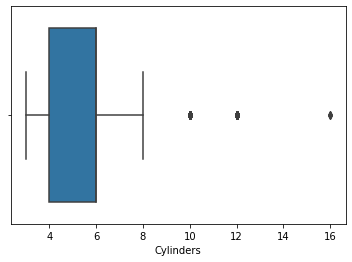

In [70]:
# Outliers in Cylinders column
max=df['Cylinders'].quantile(0.95)
print(max)
min=df['Cylinders'].quantile(0.05)
print(min)
df[df['Cylinders']<min]
df[df['Cylinders']>max]
df2=df[(df['Cylinders']>min)& (df['Cylinders']<max)] # to remove the outliers
df2
sns.boxplot(df['Cylinders'])

19.2
8.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


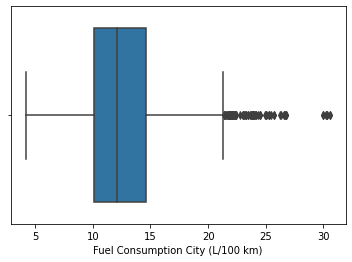

In [72]:
# Outliers in Fuel Consumption City (L/100 km) column
max=df['Fuel Consumption City (L/100 km)'].quantile(0.95)
print(max)
min=df['Fuel Consumption City (L/100 km)'].quantile(0.05)
print(min)
df[df['Fuel Consumption City (L/100 km)']<min]
df[df['Fuel Consumption City (L/100 km)']>max]
df3=df[(df['Fuel Consumption City (L/100 km)']>min)& (df['Fuel Consumption City (L/100 km)']<max)] # to remove the outliers
df3
sns.boxplot(df['Fuel Consumption City (L/100 km)'])

13.2
6.1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


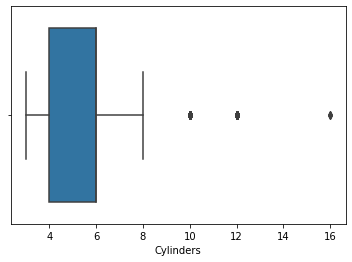

In [73]:
# Outliers in Fuel Consumption Hwy (L/100 km) column
max=df['Fuel Consumption Hwy (L/100 km)'].quantile(0.95)
print(max)
min=df['Fuel Consumption Hwy (L/100 km)'].quantile(0.05)
print(min)
df[df['Fuel Consumption Hwy (L/100 km)']<min]
df[df['Fuel Consumption Hwy (L/100 km)']>max]
df4=df[(df['Fuel Consumption Hwy (L/100 km)']>min)& (df['Fuel Consumption Hwy (L/100 km)']<max)] # to remove the outliers
df4
sns.boxplot(df['Cylinders'])

16.5
7.2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


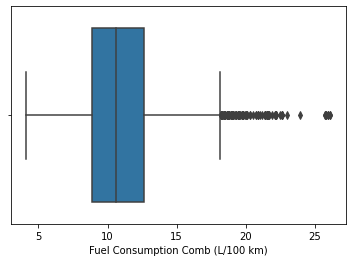

In [74]:
# Outliers in Fuel Consumption Comb (L/100 km) column
max=df['Fuel Consumption Comb (L/100 km)'].quantile(0.95)
print(max)
min=df['Fuel Consumption Comb (L/100 km)'].quantile(0.05)
print(min)
df[df['Fuel Consumption Comb (L/100 km)']<min]
df[df['Fuel Consumption Comb (L/100 km)']>max]
df5=df[(df['Fuel Consumption Comb (L/100 km)']>min)& (df['Fuel Consumption Comb (L/100 km)']<max)] # to remove the outliers
df5
sns.boxplot(df['Fuel Consumption Comb (L/100 km)'])

39.0
17.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


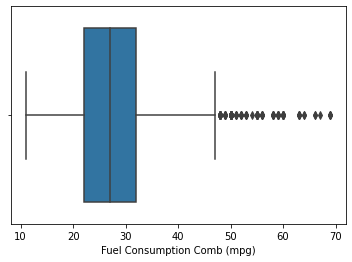

In [75]:
# Outliers in Fuel Consumption Comb (mpg) column
max=df['Fuel Consumption Comb (mpg)'].quantile(0.95)
print(max)
min=df['Fuel Consumption Comb (mpg)'].quantile(0.05)
print(min)
df[df['Fuel Consumption Comb (mpg)']<min]
df[df['Fuel Consumption Comb (mpg)']>max]
df6=df[(df['Fuel Consumption Comb (mpg)']>min)& (df['Fuel Consumption Comb (mpg)']<max)] # to remove the outliers
df6
sns.boxplot(df['Fuel Consumption Comb (mpg)'])

354.0
169.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


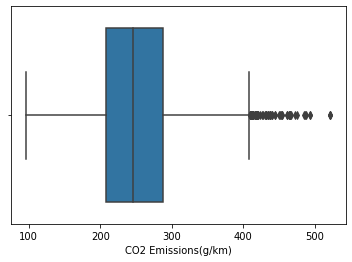

In [76]:
# Outliers in CO2 Emissions(g/km) column
max=df['CO2 Emissions(g/km)'].quantile(0.95)
print(max)
min=df['CO2 Emissions(g/km)'].quantile(0.05)
print(min)
df[df['CO2 Emissions(g/km)']<min]
df[df['CO2 Emissions(g/km)']>max]
df6=df[(df['CO2 Emissions(g/km)']>min)& (df['CO2 Emissions(g/km)']<max)] # to remove the outliers
df6
sns.boxplot(df['CO2 Emissions(g/km)'])